# Inventories Deliverable December 2021

In [5]:
import pandas as pd

import os
from tqdm import tqdm

import glob 
import plotly
import plotly.express as px
import plotly.graph_objects as go
#import dash  # (version 1.12.0) pip install dash

import numpy as np 

from plotly.offline import iplot, init_notebook_mode



In [6]:
os.getcwd()

'/srvfs/home/federico/GitHub/CEUAS_master_JULY2922/CEUAS/CEUAS/meta/inventory_comparison_2/code/notebooks'

### Extracting the data from the saved CSV files CUON station_configuration

In [14]:
stat_conf_dir = '../station_configuration'

name = '_station_configuration_extended.csv'
allds = ['ncar','igra2','amma','hara', 'bufr', 'giub']
ecmwf = ['era5_1','era5_2','era5_1759', 'era5_1761' ]


In [28]:
all_stat_conf = [ f for f in os.listdir( stat_conf_dir) ]

# [x + y for x in l2 for y in l1 ]
all_ecmwf_df = []
for e in ecmwf:
    df = pd.read_csv( '../station_configuration/'+e+'_station_configuration_extended.csv', sep = '\t' )
    df['dataset'] = 'ECMWF'
    all_ecmwf_df.append(df)

df_ecmwf = pd.concat(all_ecmwf_df)
df_ecmwf = df_ecmwf.drop_duplicates( subset=['primary_id'] )
df_ecmwf = df_ecmwf[['primary_id','latitude','longitude','dataset']]


dic_names = {'ncar':'NCAR',
       'igra2':"IGRA2",
       'amma':"AMMA",
       'hara':"HARA",
       'bufr':"BUFR", 
       'giub': "GIUB"}


other_ds = []
for e in allds:
    df = pd.read_csv( '../station_configuration/'+e+'_station_configuration_extended.csv', sep = '\t' )
    df['dataset'] = dic_names[e]
    print(e, '  ' , len(df))
    other_ds.append(df)

other_ds = pd.concat(other_ds)
other_ds = other_ds[['primary_id','latitude','longitude','dataset']]


all_df = pd.concat([other_ds, df_ecmwf])



ncar    3713
igra2    2779
amma    67
hara    87
bufr    2728
giub    1748


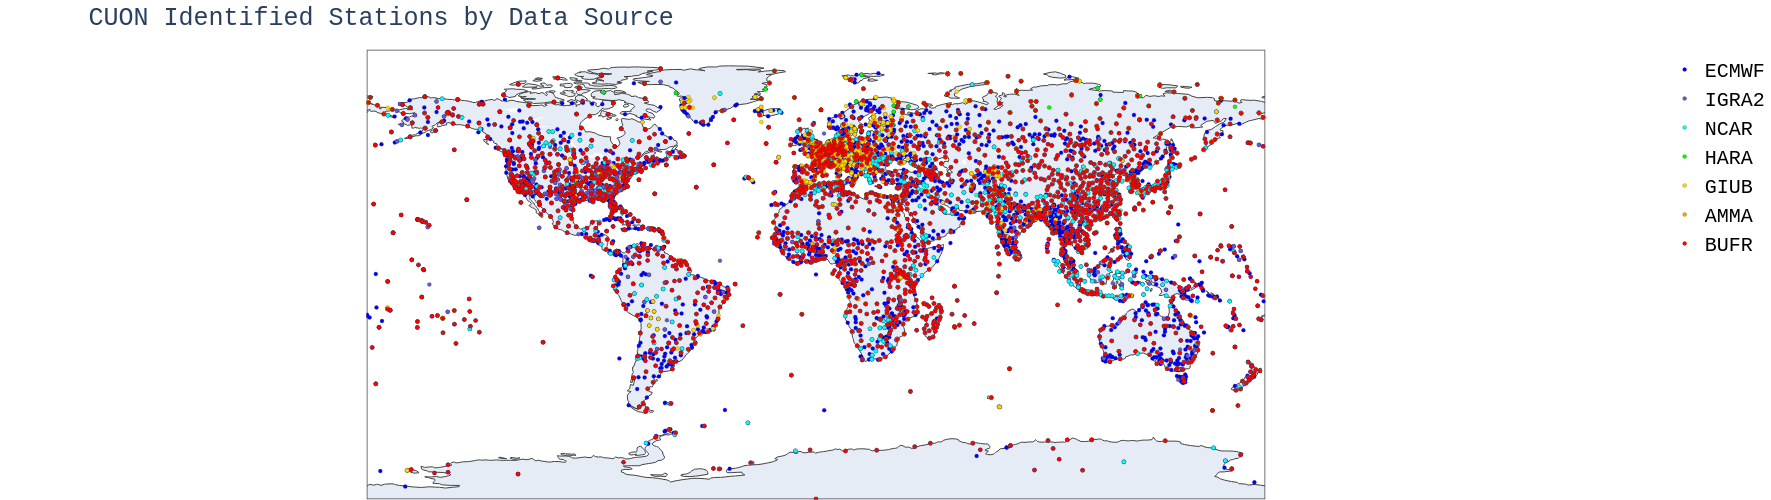

In [43]:

colors = ['blue','slateblue','cyan','lime','gold','orange','red']

fig = go.Figure()
for s,c in zip( ["ECMWF",'IGRA2',"NCAR", 'HARA', 'GIUB', 'AMMA', 'BUFR'] , colors):
    # print(s,c)
    dff = all_df[all_df.dataset == s ]
    fig.add_trace(go.Scattergeo(
            lon = dff['longitude'],
            lat = dff['latitude'],
            #text = dff['text'],
            mode = 'markers',
            name = s,
            marker = dict(
                size=4,
                color = c,
                line_color='rgb(40,40,40)',
                line_width=0.2,
                sizemode='area',
            )
    ))



fig.update_layout(
    title = dict(text="CUON Identified Stations by Data Source", 
                 font=dict(family = "Courier", size=25)),
    
    margin=dict(l=0, r=1, t=50, b=1),
    paper_bgcolor="white",
    width=1000,
    height=500,
    
    legend = dict(font = dict(family = "Courier", size = 20, color = "black")),
    
            legend_title = dict(font = dict(family = "Courier", size = 30, color = "blue"))
    

)

fig.show()

In [ ]:
#db = 'era5_1'

#full_path = dir + '/' + db 
#files = glob.glob(full_path + '/*_reduced*')

In [ ]:
# Extracting all csv to df in a list

In [ ]:
def make_map(df, db=''):
    
    #df["color"] = "blue"
    
    
    fig = go.Figure()

    fig=px.scatter_geo(df,lon='lon', lat='lat',
                       opacity=0.8,
                       #projection="natural earth",
                       hover_data={'stationId': True,
                                   'lon':True,'lat':True,'station':True,
                                   'OSCAR':True,
                                   'IGRA2':True,
                                   'WBAN' :True,
                                   "CHUAN":True,
                                  "isRadio":True,
                                  "file":True},
                      color = 'db',
                      title = 'Distribution of all ' + db + 'stations')
                       
                       
    
    """
    for s in ["0-20000-0-06610" , "0-20001-0-10393" ,"0-20001-0-11035" ]:
        a = np.where( df.primary_id == s )[0]
        df.at[a, 'color'] = 'red'
        fig.add_trace(
            go.Scattergeo(lon=df["longitude"], 
                          lat=df["latitude"],
                          color = df["color"]
                       #projection="natural earth",
                       #hover_data={'longitude':True,'latitude':True,'name':True, 'primary_id':True} )
                        ) )
        
        #fig.update_traces(marker=dict(color="red" , size = 10 ) )
    """
        
    fig.update_layout(
    title="Map for the Database " + db,

    margin=dict(l=0, r=1, t=50, b=1),
    paper_bgcolor="white",
    width=1000,
    height=500)

    return fig 